In [54]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  harshitmaster


Your Kaggle Key:

  ········


100%|██████████| 612M/612M [00:40<00:00, 16.0MB/s] 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN

In [3]:
import csv
with open('Train.csv', mode ='r')as file:
    Train_File = csv.reader(file)

In [4]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join(cur_path,'train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
     try: 
         image = Image.open(path +"/"+a) 
         image = image.resize((30,30)) 
         image = np.array(image) 
         data.append(image) 
         labels.append(i) 
     except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [7]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#Compilation of the model
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 64s 64ms/step - loss: 1.8201 - accuracy: 0.5321 - val_loss: 0.3597 - val_accuracy: 0.9189
Epoch 2/15
981/981 [==============================] - 62s 63ms/step - loss: 0.5006 - accuracy: 0.8545 - val_loss: 0.1689 - val_accuracy: 0.9566
Epoch 3/15
981/981 [==============================] - 61s 62ms/step - loss: 0.3393 - accuracy: 0.9063 - val_loss: 0.0862 - val_accuracy: 0.9819
Epoch 4/15
981/981 [==============================] - 61s 63ms/step - loss: 0.2590 - accuracy: 0.9288 - val_loss: 0.0716 - val_accuracy: 0.9804
Epoch 5/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2356 - accuracy: 0.9368 - val_loss: 0.0768 - val_accuracy: 0.9819
Epoch 6/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2380 - accuracy: 0.9391 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 7/15
981/981 [==============================] - 65s 67ms/step - loss: 0.2221 - accuracy: 0.9414 - val_loss: 0.0733 - val_accuracy:

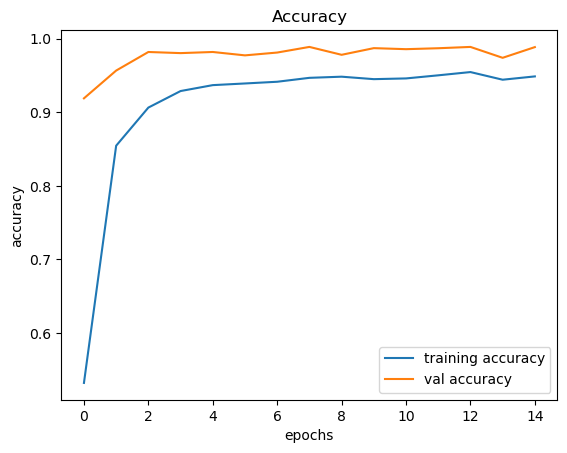

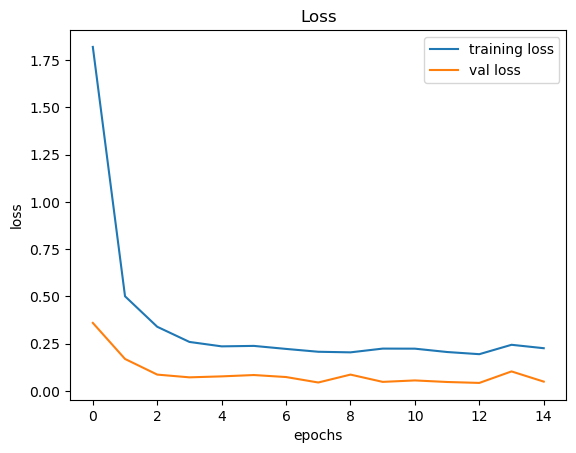

In [9]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].ravel()
imgs = y_test["Path"].ravel()
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test).round()
pred=np.argmax(pred, axis=1)
print(accuracy_score(labels, pred))

395/395 [==============================] - 5s 11ms/step
0.9505146476642914


In [12]:
model.save('traffic_classifier.h5')